In [1]:
%load_ext autoreload
%autoreload 2

# Imports

In [2]:
from trott import *
from qiskit import IBMQ
from qiskit.providers.aer import QasmSimulator
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Prepare Circuits

In [3]:
trott_gate = gen_trott_gate() # using the basic trott method (this can be changed)x
trott_steps_range = np.arange(4,25,1)
qcs = gen_st_qcs_range(trott_gate, trott_steps_range)
# qcs[10][-2].draw() # e.g. 10 trott steps, example tomo circuit

# Prepare Backend

In [4]:
# load IBMQ Account data

# IBMQ.save_account(TOKEN)  # replace TOKEN with your API token string (https://quantum-computing.ibm.com/lab/docs/iql/manage/account/ibmq)
provider = IBMQ.load_account()

In [5]:
# Get backend for experiment
provider = IBMQ.get_provider(hub='ibm-q-community', group='ibmquantumawards', project='open-science-22')
jakarta = provider.get_backend('ibmq_jakarta')
# properties = jakarta.properties()

# Simulated backend based on ibmq_jakarta's device noise profile
sim_noisy_jakarta = QasmSimulator.from_backend(provider.get_backend('ibmq_jakarta'))

# Noiseless simulated backend
sim = QasmSimulator()

# Capture Data

In [ ]:
results = gen_results_qpu(qcs, backend=jakarta, label="data/qpu_results")
# results = np.load('data/noiseless_results.npy',allow_pickle=True).item()

  0%|                                                                                                                 | 0/21 [00:00<?, ?it/s]

Submitting jobs with trott_steps = 4
Job ID 62583b7be6c5b81fe2a05896
Job ID 62583b7e3ce751e9e0a14415
Job ID 62583b83e6c5b87d3da05897
Job ID 62583b863213e6df8ab67266
Job ID 62583b8ab4364e64e251679a
Job ID 62583b8e3213e60c91b67267
Job ID 62583b913213e67b14b67268


  5%|█████                                                                                                    | 1/21 [00:31<10:38, 31.91s/it]

Job ID 62583b953213e63830b67269
Submitting jobs with trott_steps = 5
Job ID 62583b9ae6c5b82c1ca05898
Job ID 62583b9e3ce75133a3a14417
Job ID 62583ba2b4364eea1c51679b
Job ID 62583ba6f7eca7c043818acc
Job ID 62583baa5756352078d43c1c
Job ID 62583bae57563565e8d43c1d
Job ID 62583bb3aee78d20eee6c15c


 10%|██████████                                                                                               | 2/21 [01:05<10:25, 32.90s/it]

Job ID 62583bb7b4364e22db51679d
Submitting jobs with trott_steps = 6
Job ID 62583bbc2d87601afb9ac2f4
Job ID 62583bc1575635e358d43c20
Job ID 62583bc7e6c5b8d009a05899
Job ID 62583bcce6c5b81dc6a0589a
Job ID 62583bd1b4364e07ab51679f
Job ID 62583bd6f82d164fb3e3bf9a
Job ID 62583bdff7eca7753e818acd


 14%|███████████████                                                                                          | 3/21 [01:51<11:37, 38.73s/it]

Job ID 62583be52d87601ea89ac2f5
Submitting jobs with trott_steps = 7
Job ID 62583beae6c5b819cfa0589b
Job ID 62583bf03213e606e7b6726e


# Run Analysis

In [63]:
res_analysis = run_analysis(results) 

In [64]:
compare_Z_parity(res_analysis)

 	Expected | n=19
<ZZZ>	1.0	   1.000
<ZZI>	-1.0	   -0.687
<ZIZ>	-1.0	   -0.959
<IZZ>	1.0	   0.646
<ZII>	1.0	   0.646
<IZI>	-1.0	   -0.959
<IIZ>	-1.0	   -0.686


In [66]:
res_analysis["data"][5]["avg_infid"], np.mean(res_analysis["data"][5]["infids"]) # these should match

(0.7430354315938146, 0.7430354315938147)

#### Plots

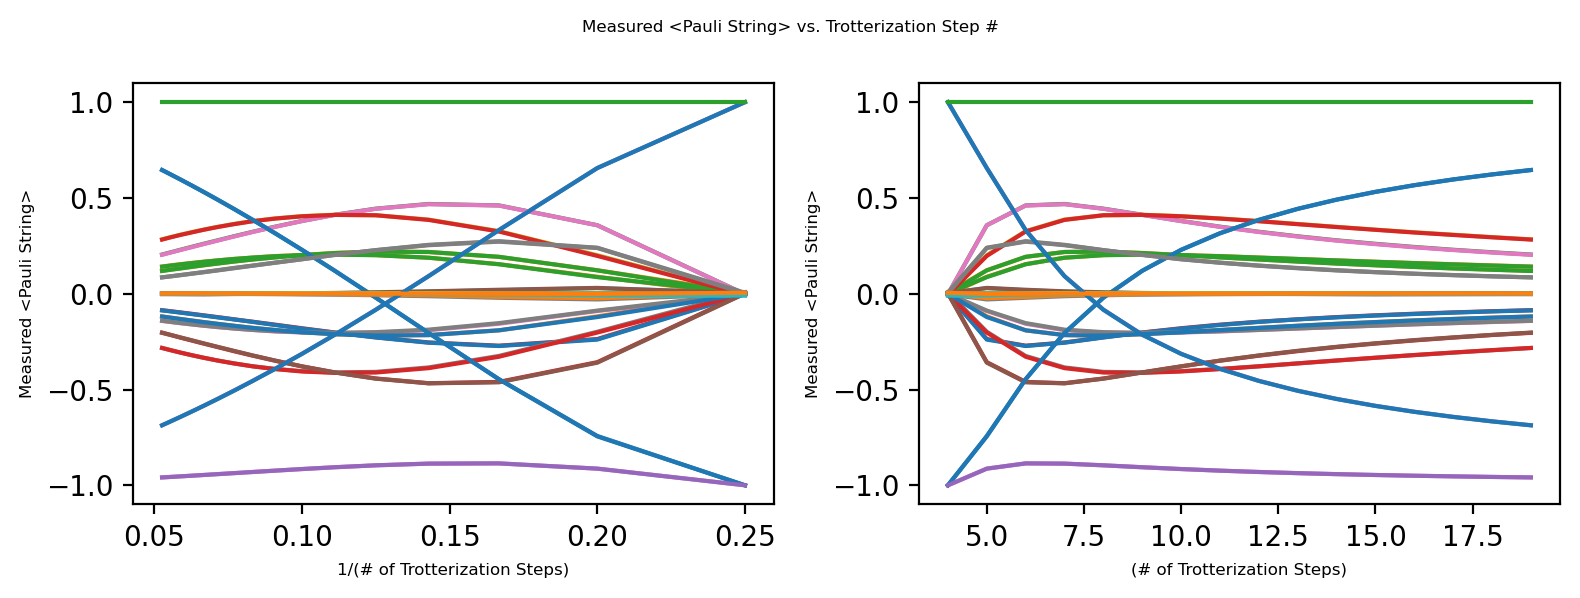

In [67]:
axs = plot_parity(res_analysis)

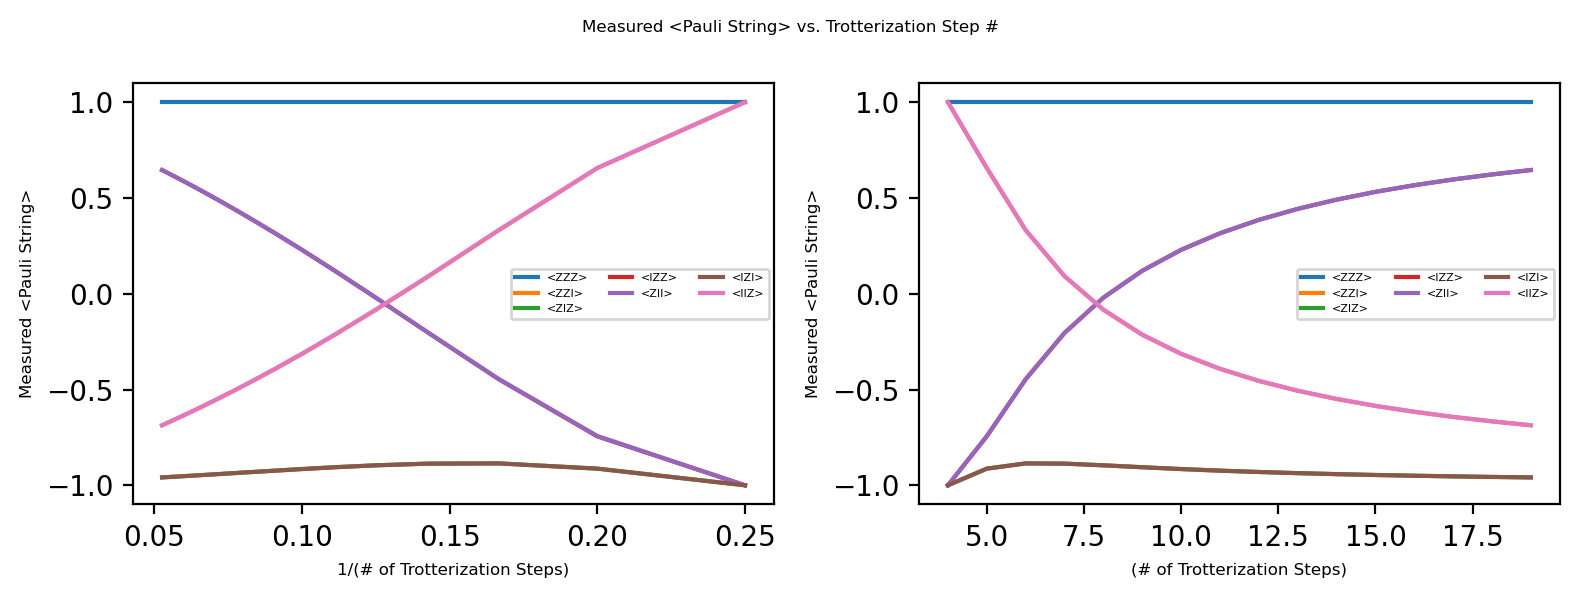

In [68]:
axs = plot_parity(res_analysis, parity_strings=["ZZZ", "ZZI", "ZIZ", "IZZ", "ZII", "IZI", "IIZ"], legend=True)

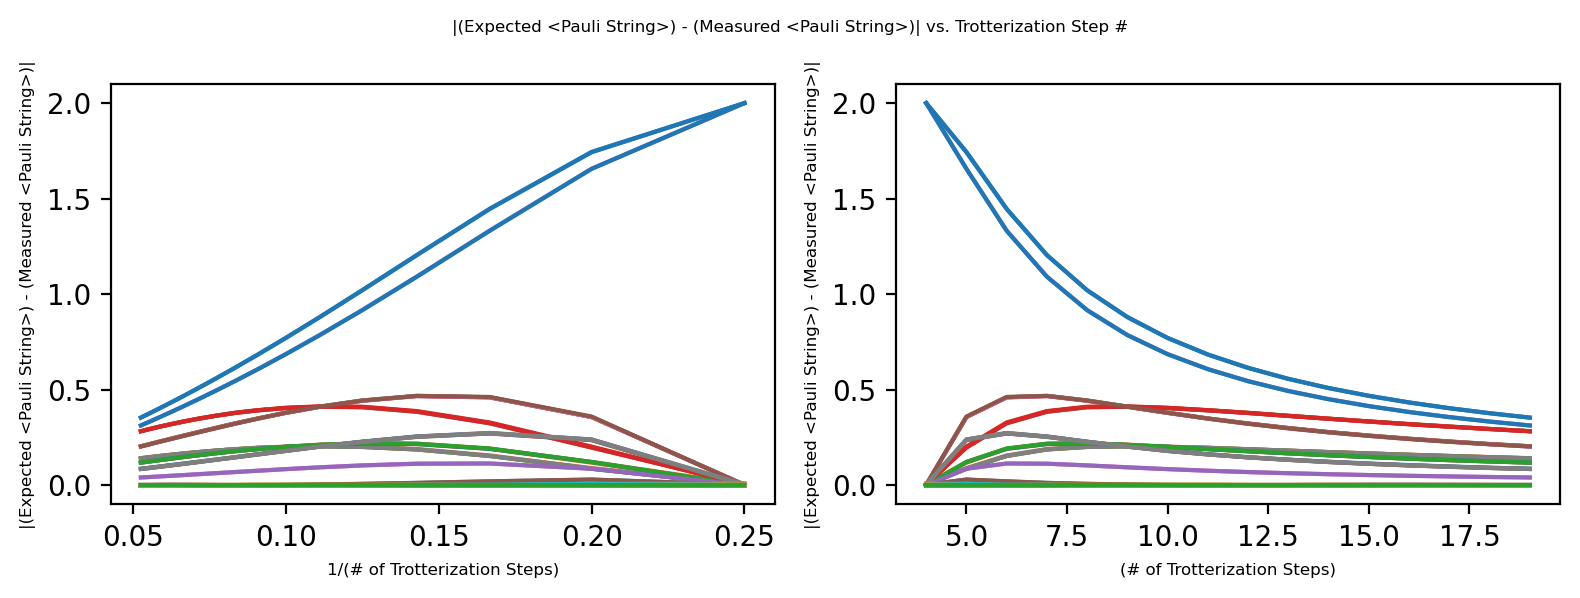

In [69]:
axs = plot_parity_dist(res_analysis)

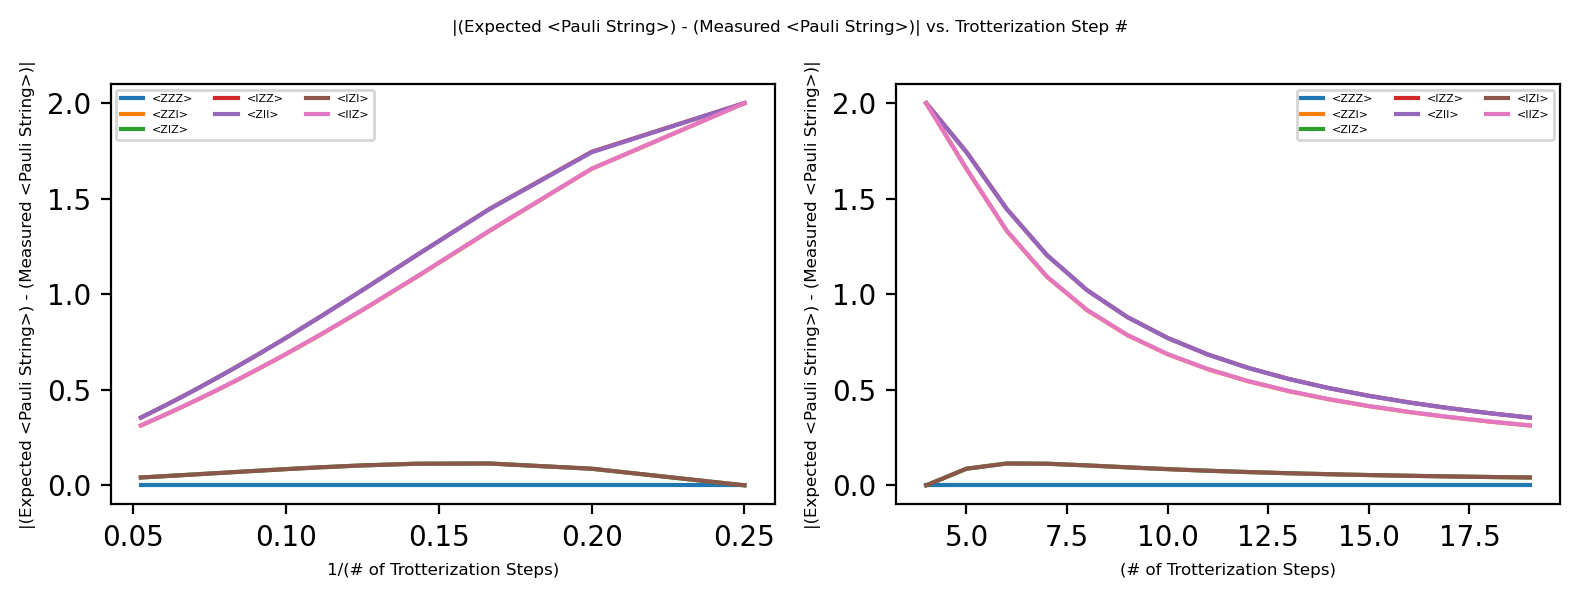

In [70]:
axs = plot_parity_dist(res_analysis, parity_strings=["ZZZ", "ZZI", "ZIZ", "IZZ", "ZII", "IZI", "IIZ"], legend=True)

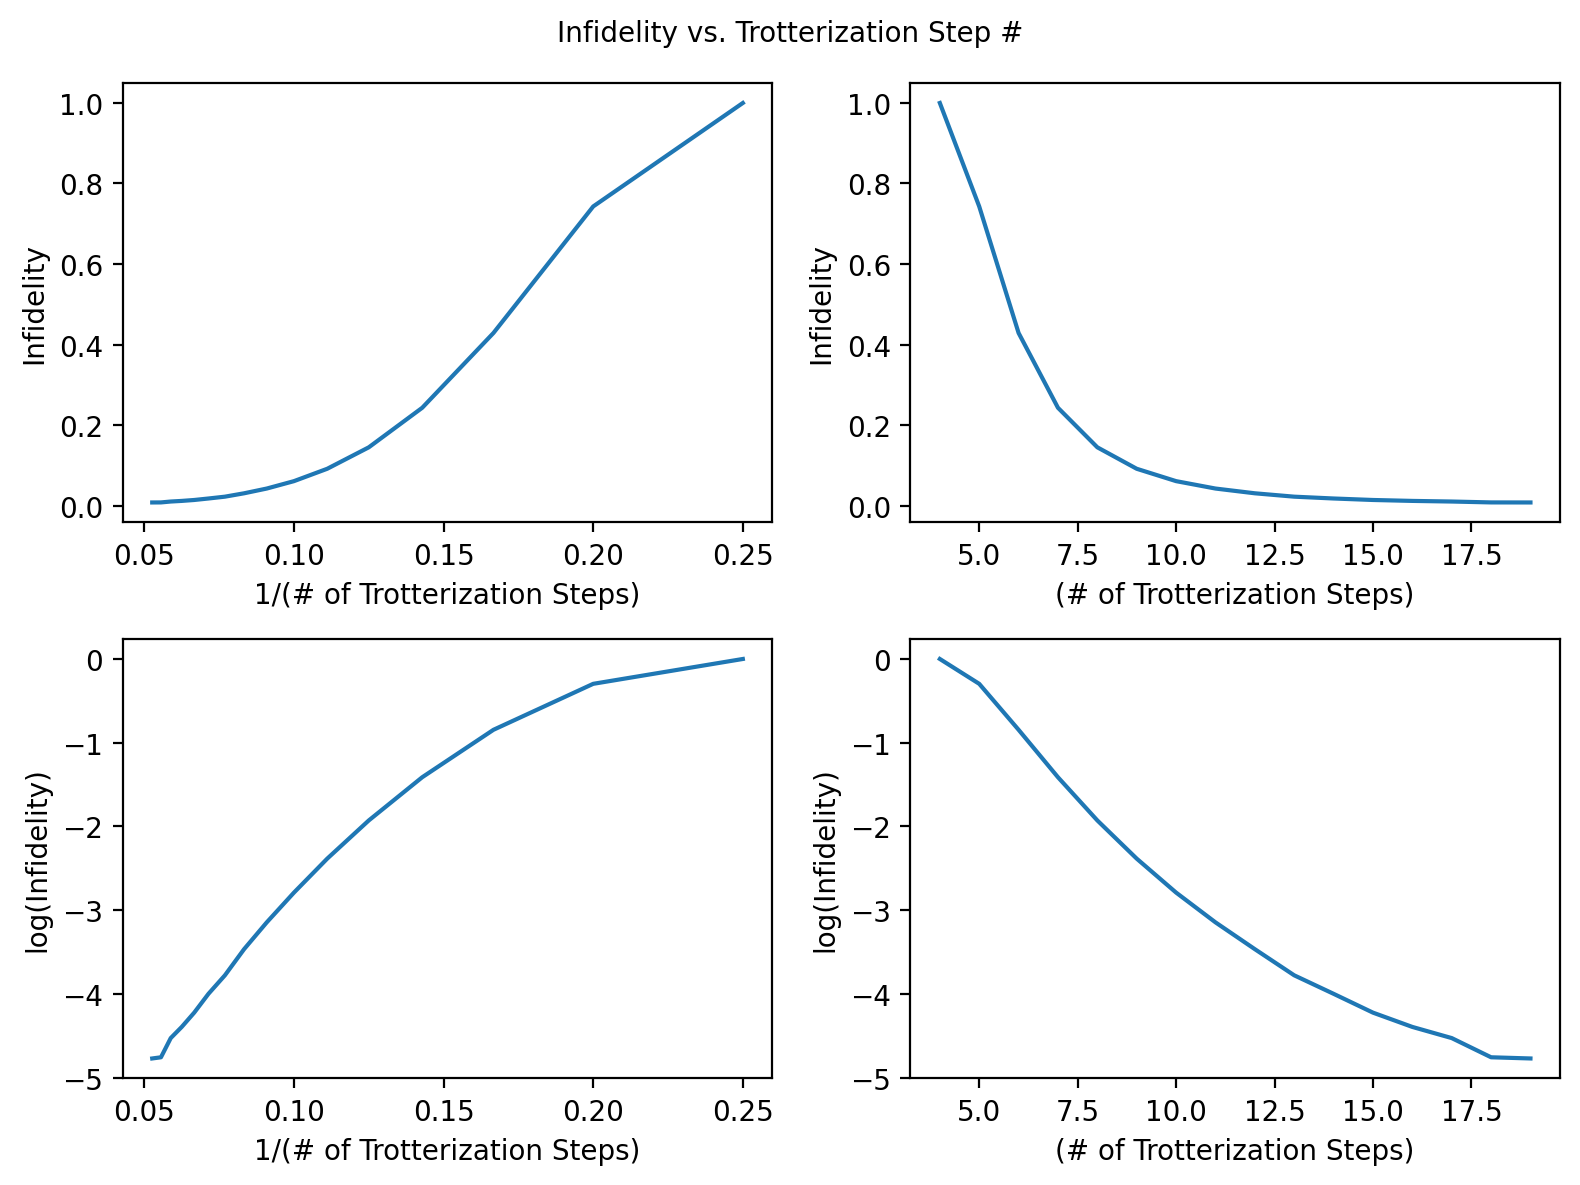

In [71]:
_ = plot_fidelities(res_analysis)

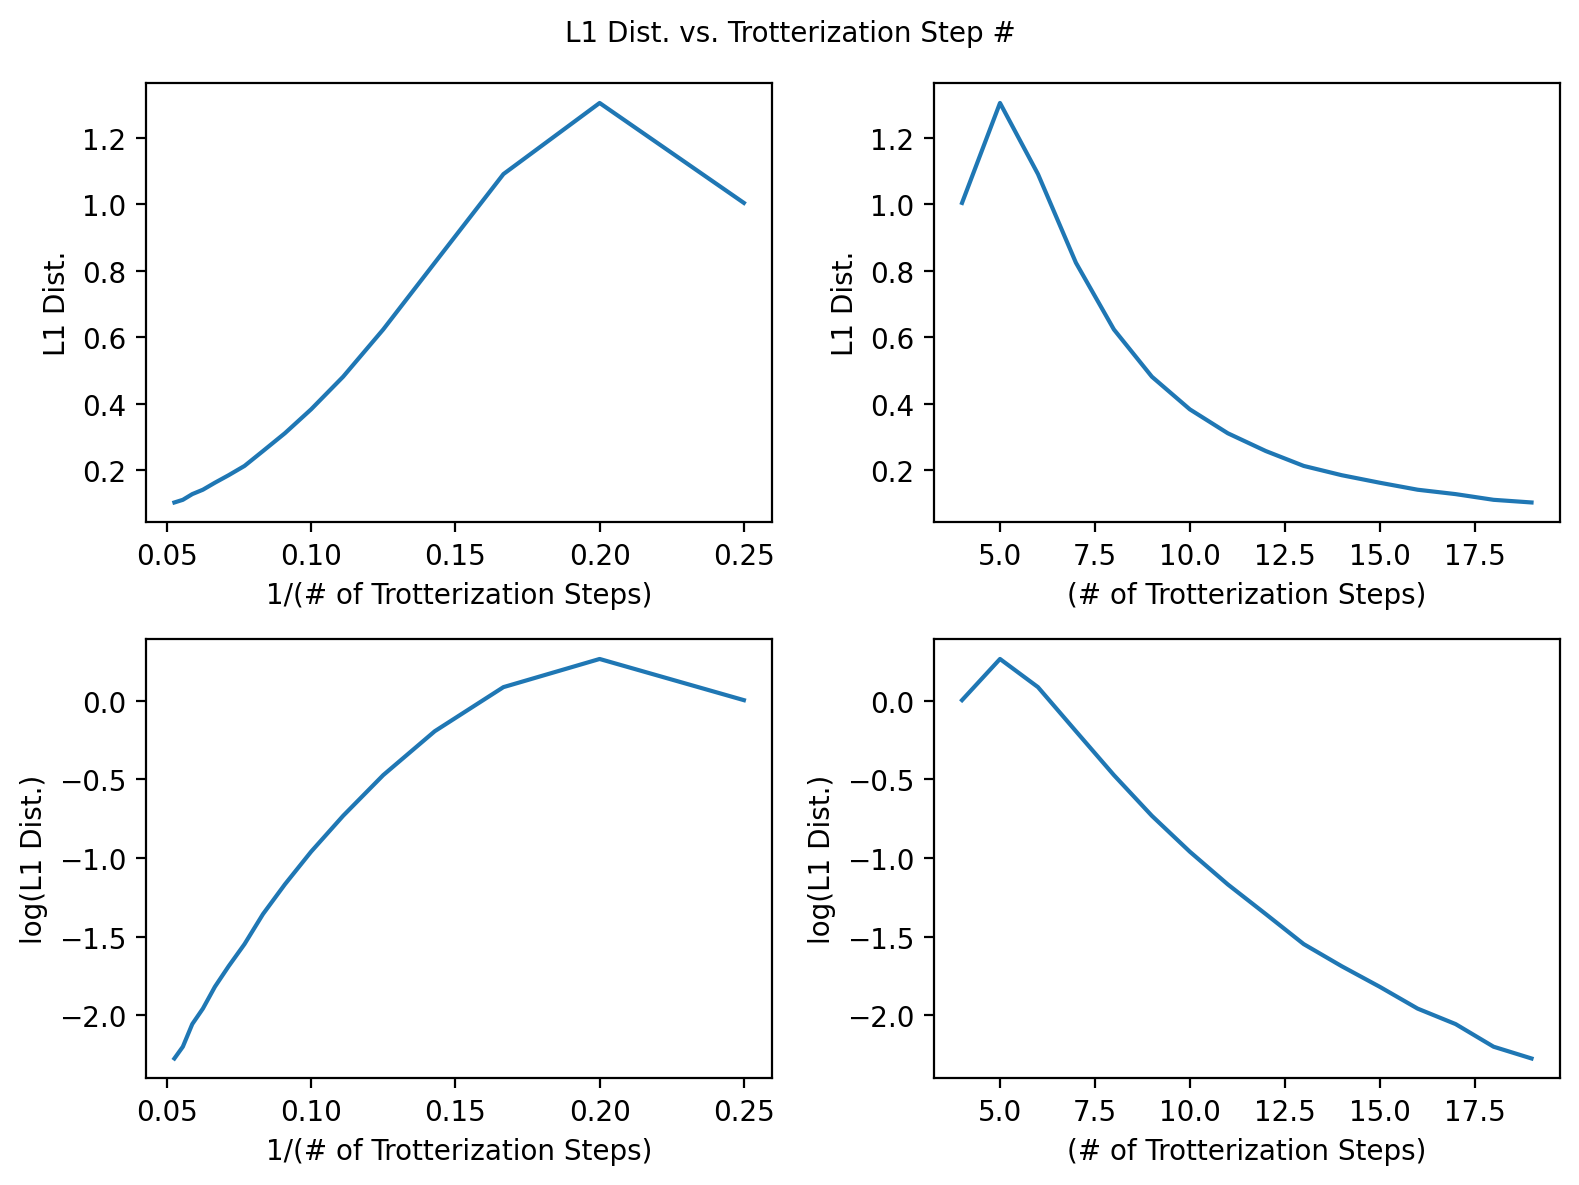

In [72]:
_ = plot_l1_dist(res_analysis)

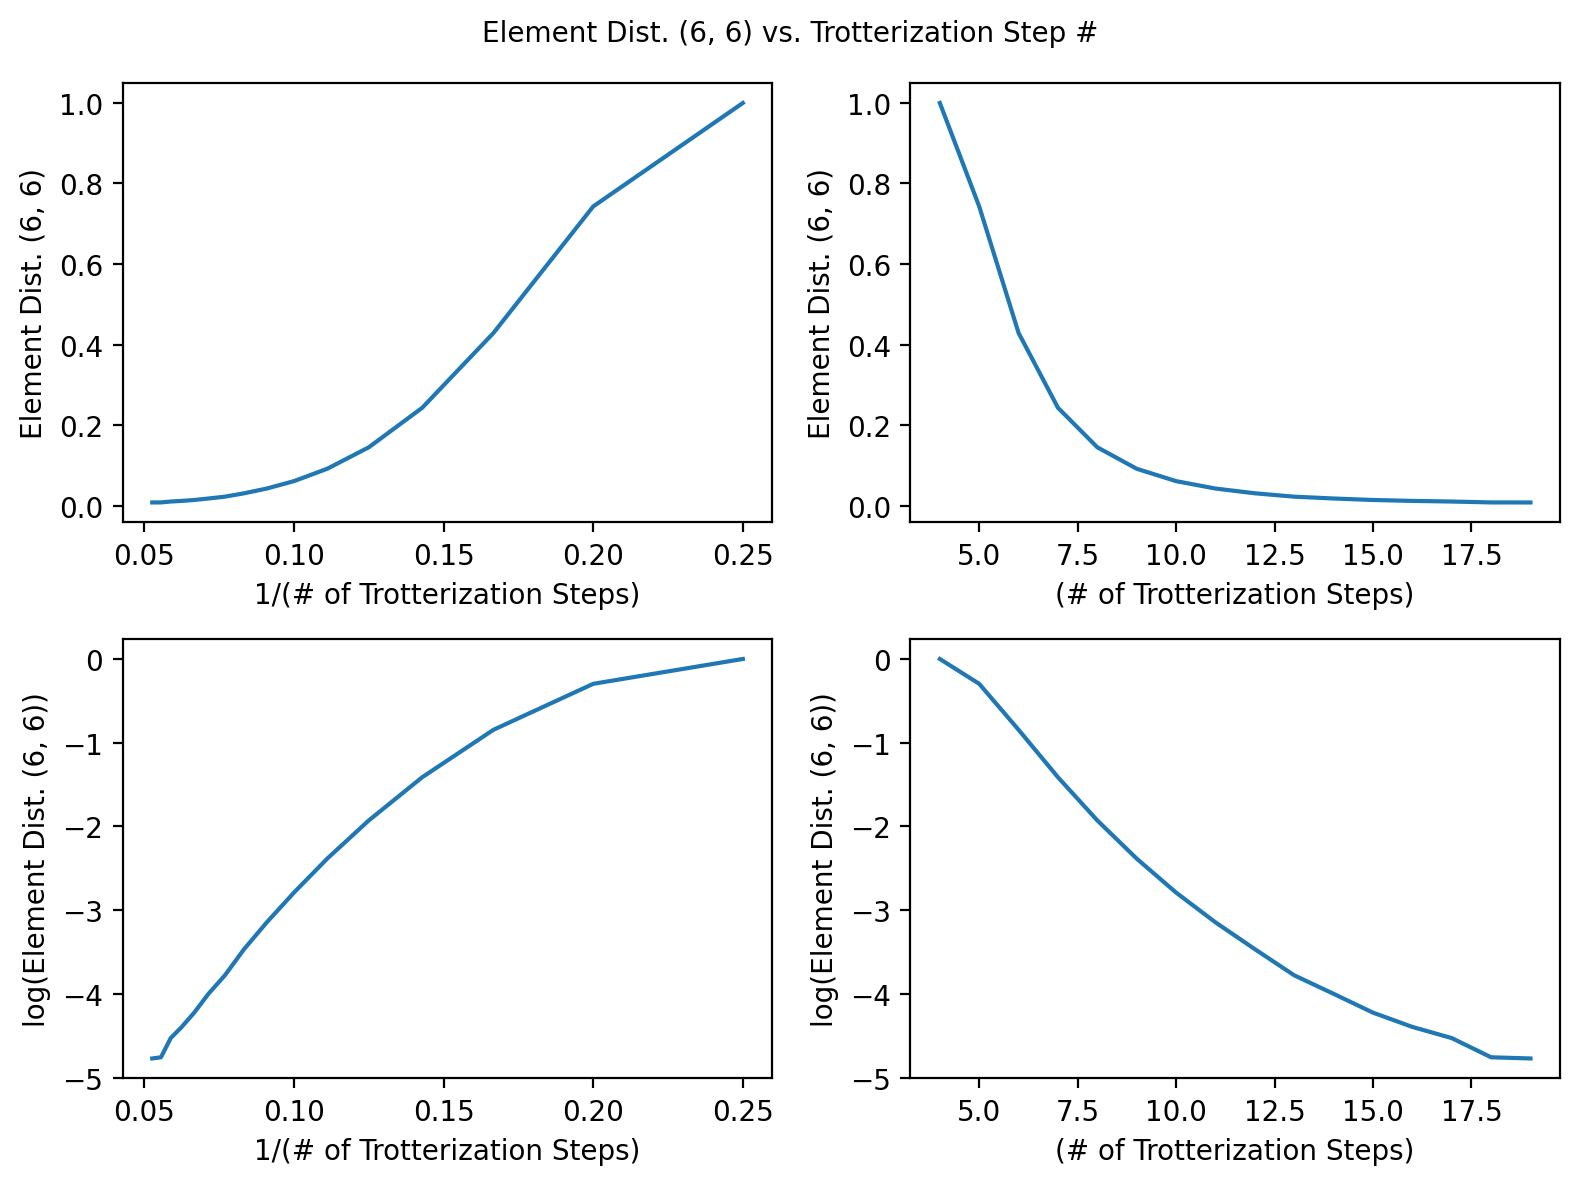

In [73]:
_ = plot_element_dist(res_analysis)

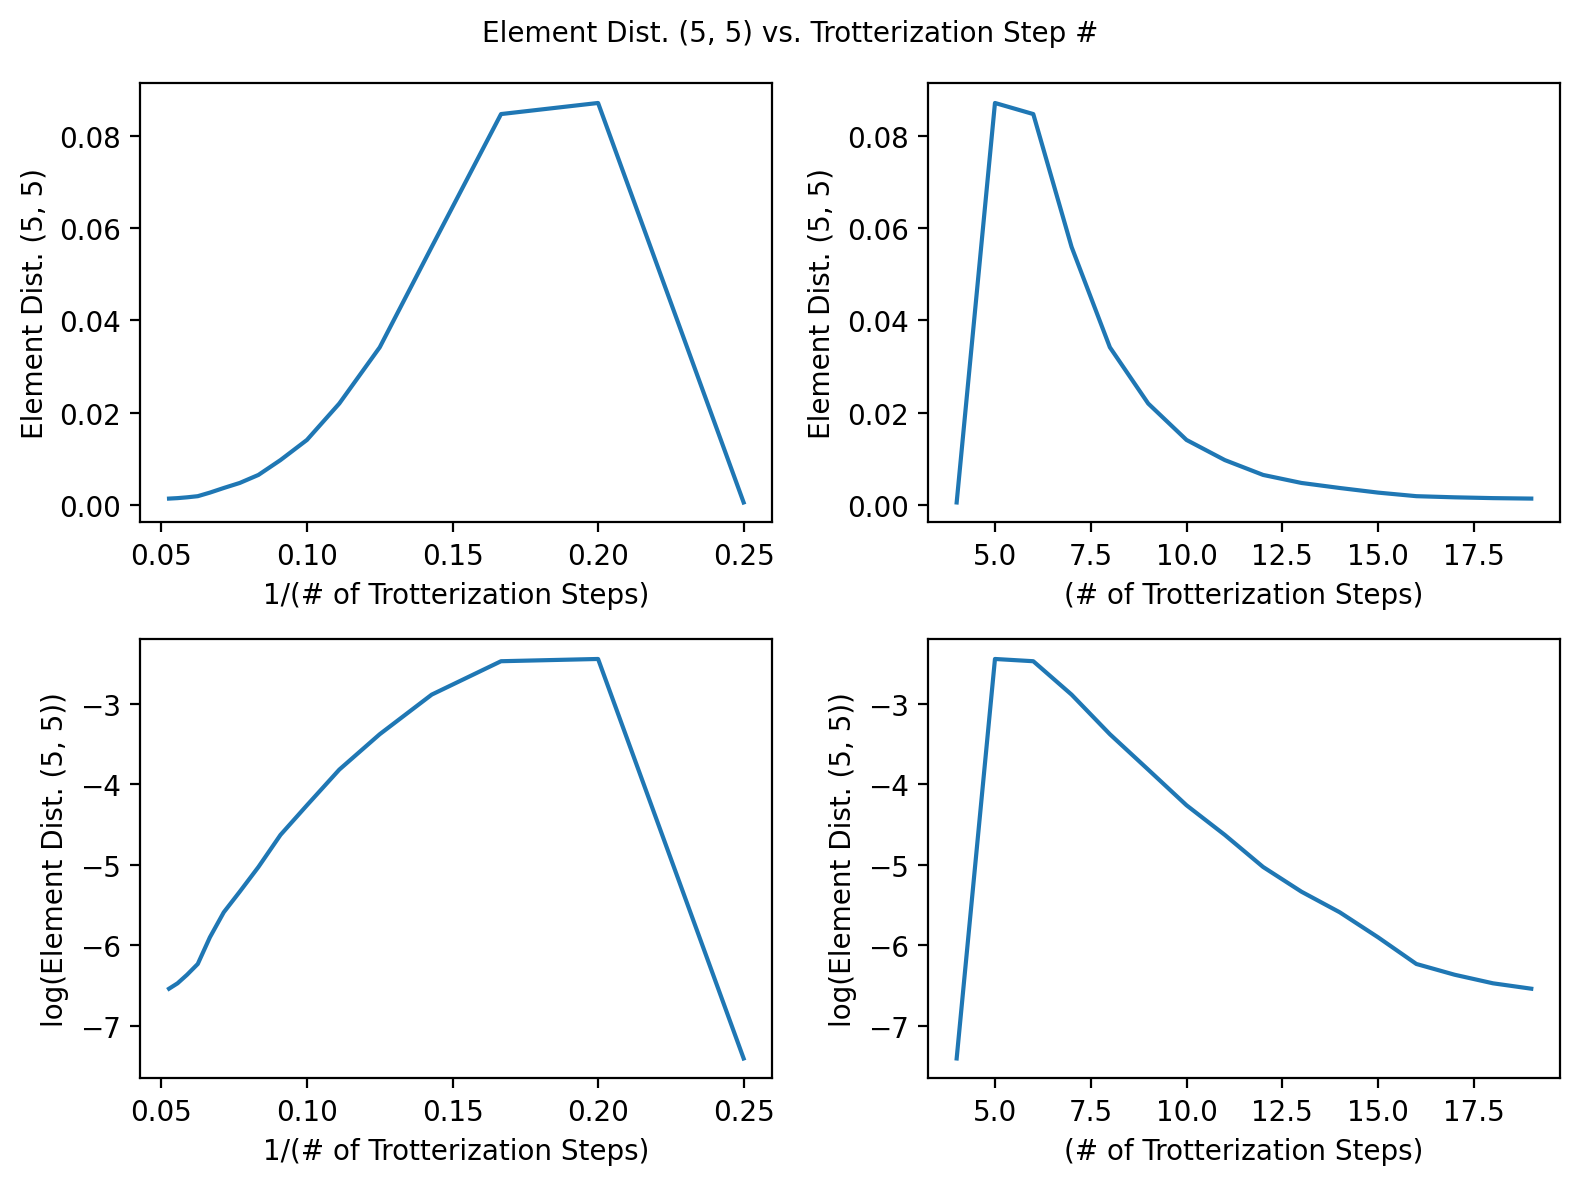

In [74]:
_ = plot_element_dist(res_analysis, row=5, col=5)

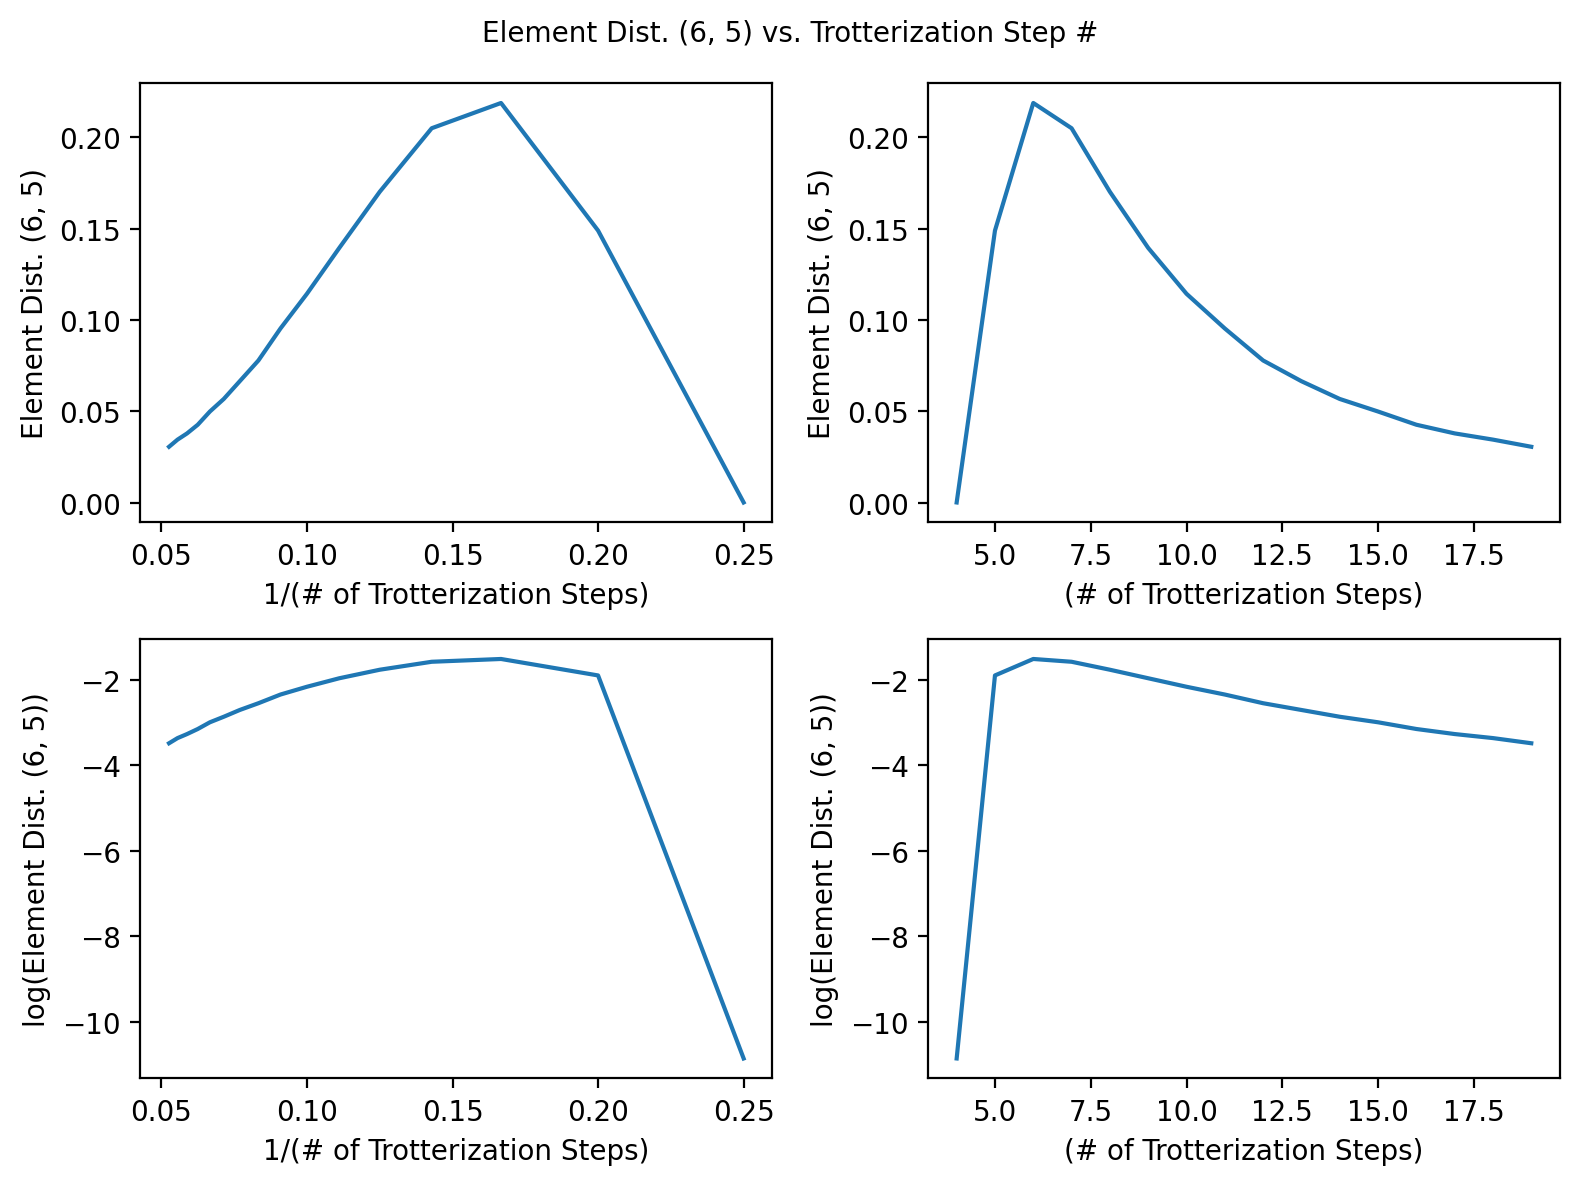

In [75]:
_ = plot_element_dist(res_analysis, row=6, col=5)

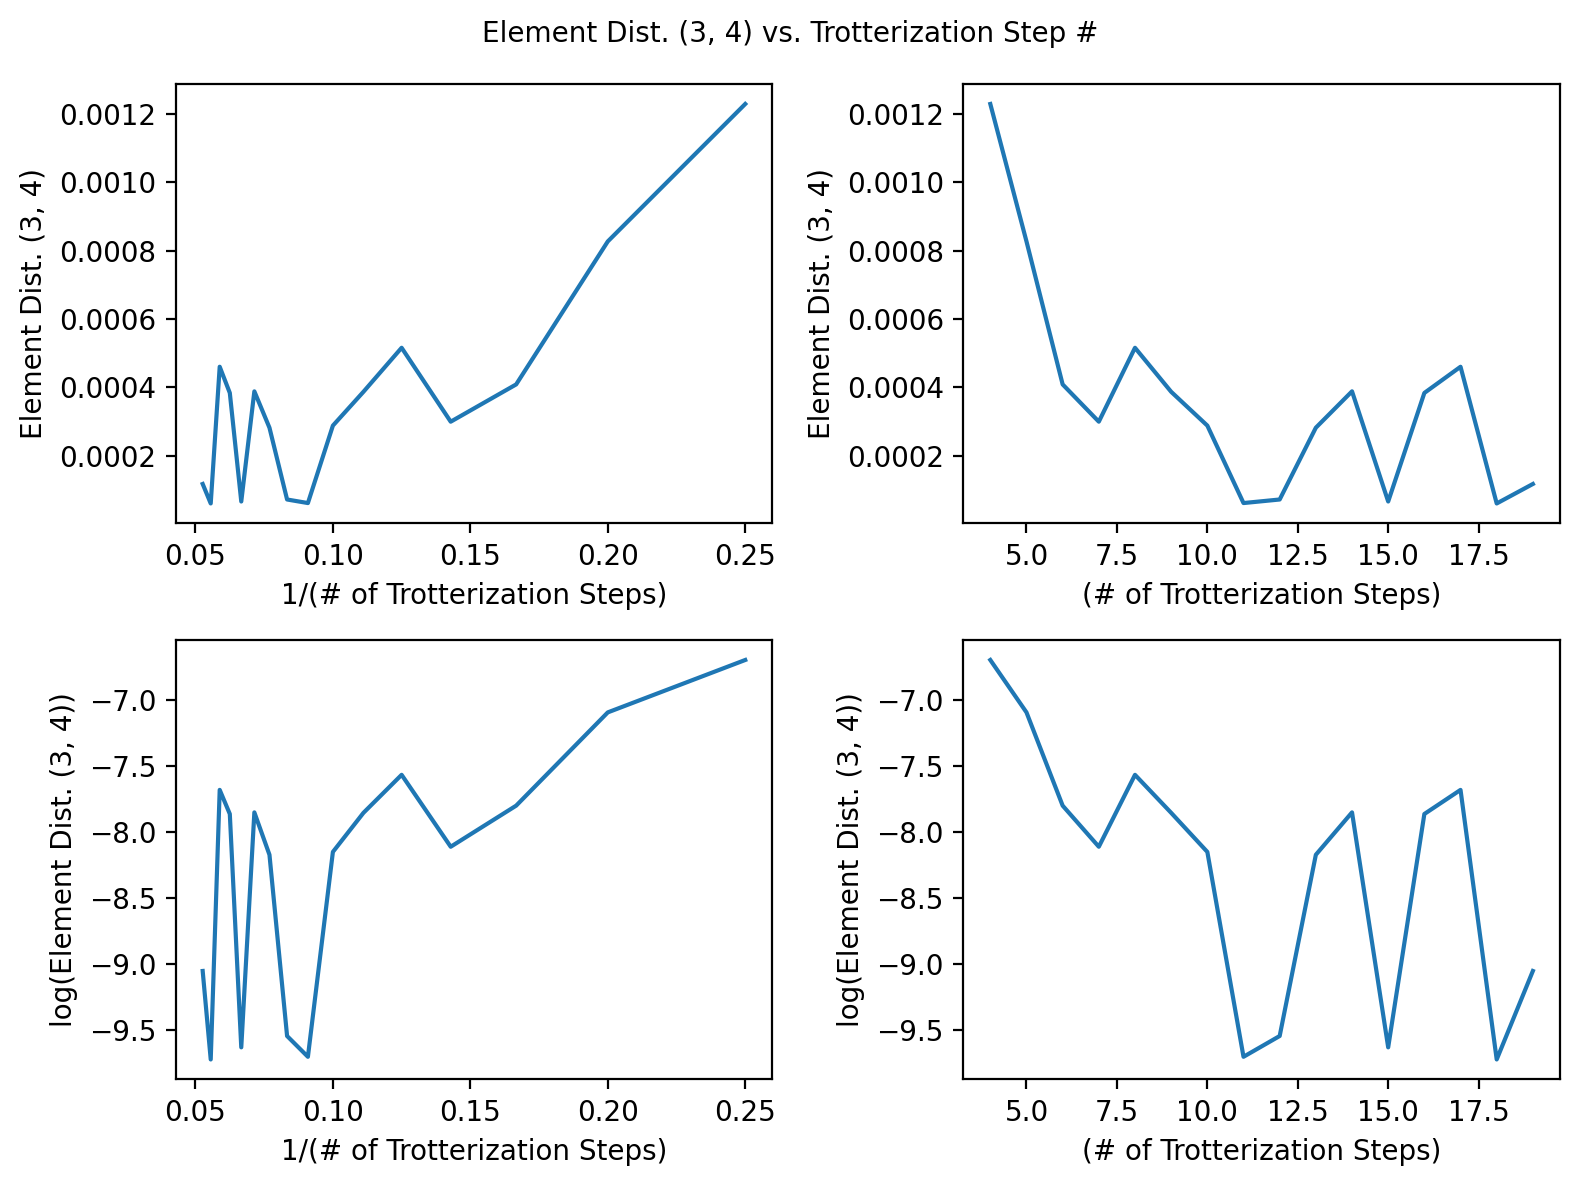

In [76]:
_ = plot_element_dist(res_analysis, row=3, col=4)